In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-05-21.csv")

In [3]:
df = pd.read_csv("data/knn/data-knn-2024-05-27.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172999 entries, 0 to 172998
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        172999 non-null  int64  
 1   id_mls                    172999 non-null  object 
 2   bathrooms_total           172999 non-null  float64
 3   bedrooms_extra            172999 non-null  float64
 4   bedrooms                  172999 non-null  float64
 5   stories_total             172999 non-null  float64
 6   size_interior             172999 non-null  float64
 7   building_type             172999 non-null  object 
 8   agency_name               172999 non-null  object 
 9   agency_type               172999 non-null  object 
 10  property_type             172999 non-null  object 
 11  lng                       172999 non-null  float64
 12  lat                       172999 non-null  float64
 13  ownership_type            172999 non-null  o

In [5]:
df["province"].value_counts()

province
Ontario                    84485
British Columbia           37638
Alberta                    23814
Quebec                      9149
Saskatchewan                6661
Manitoba                    5138
Nova Scotia                 2856
New Brunswick               1904
Prince Edward Island         594
Newfoundland & Labrador      577
Yukon                        124
Northwest Territories         59
Name: count, dtype: int64

In [6]:
df["province"].value_counts()

province
Ontario                    84485
British Columbia           37638
Alberta                    23814
Quebec                      9149
Saskatchewan                6661
Manitoba                    5138
Nova Scotia                 2856
New Brunswick               1904
Prince Edward Island         594
Newfoundland & Labrador      577
Yukon                        124
Northwest Territories         59
Name: count, dtype: int64

In [7]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [8]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       84485.0
mean       919053.0
std        527984.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1095000.0
max      11488000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

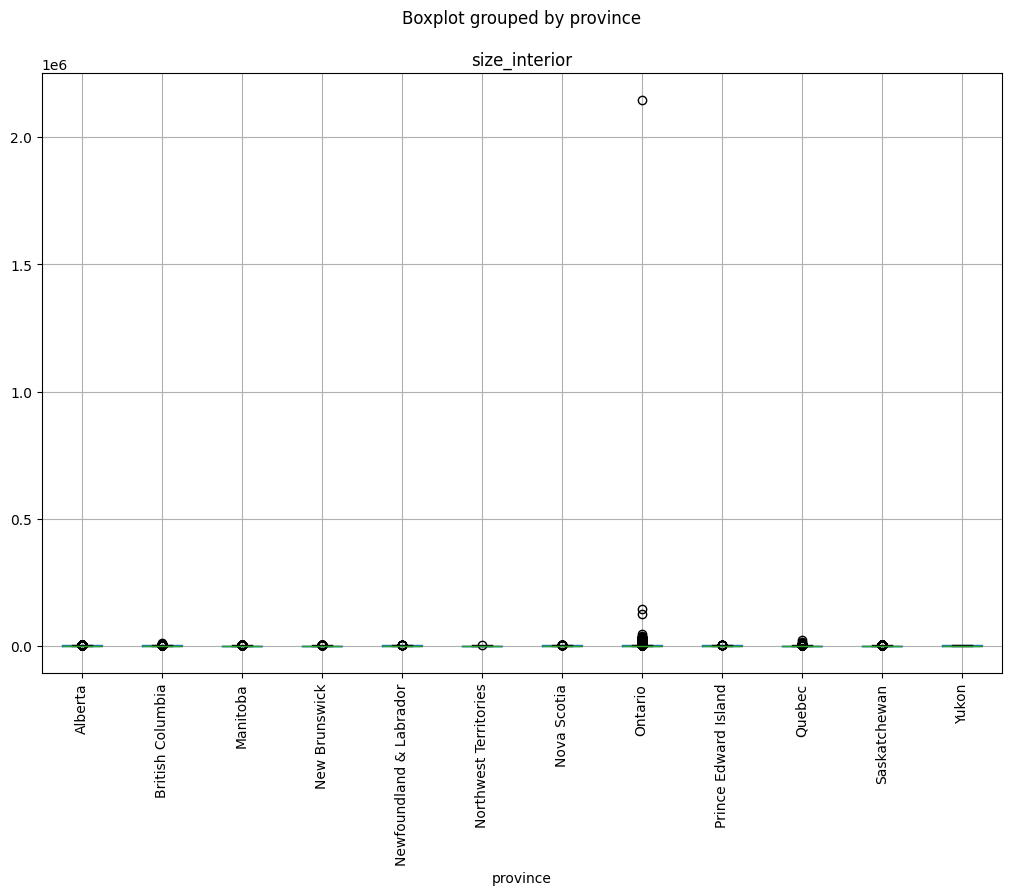

In [9]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [10]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

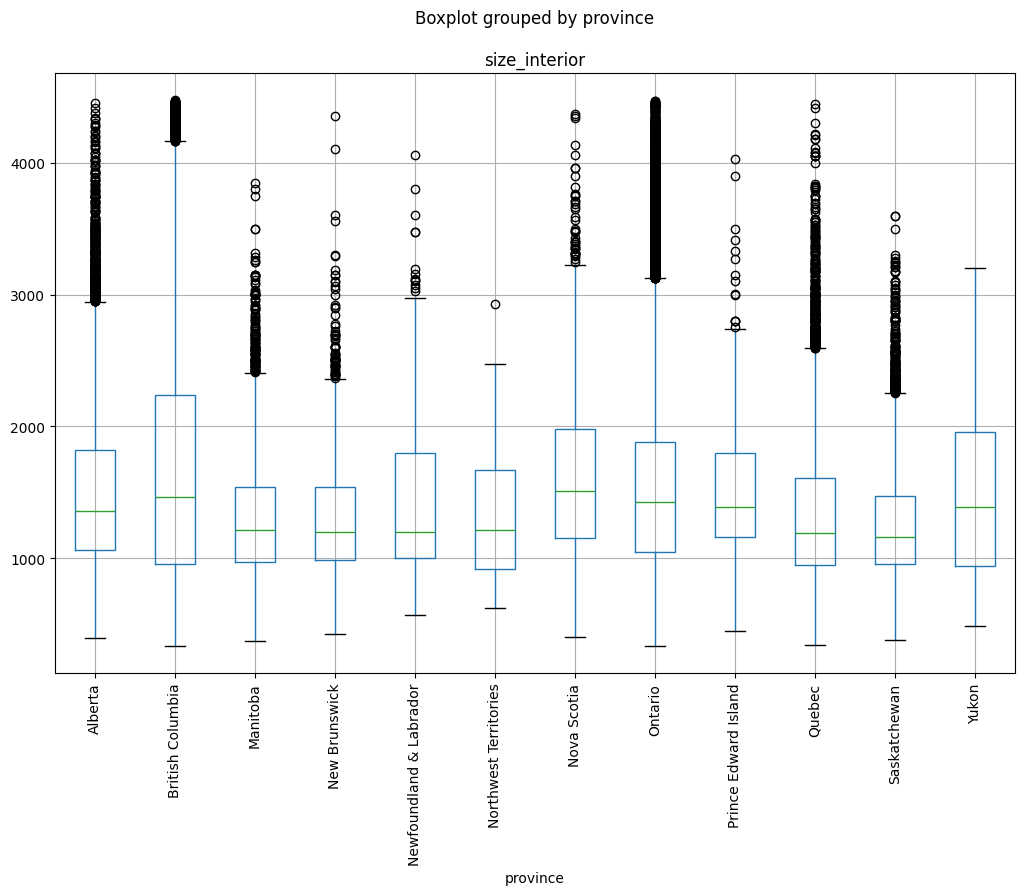

In [11]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

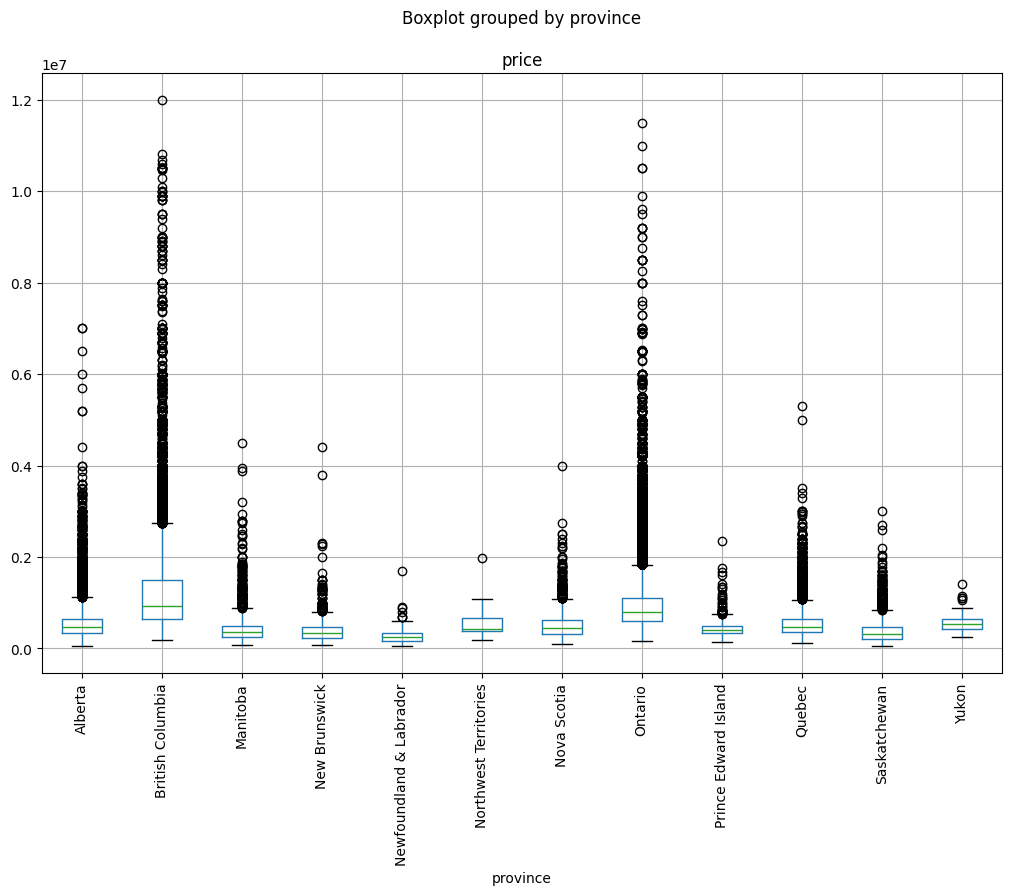

In [12]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [13]:
df["province"].value_counts()

province
Ontario                    84226
British Columbia           37598
Alberta                    23812
Quebec                      9135
Saskatchewan                6661
Manitoba                    5138
Nova Scotia                 2855
New Brunswick               1903
Prince Edward Island         594
Newfoundland & Labrador      577
Yukon                        124
Northwest Territories         59
Name: count, dtype: int64

In [14]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       84226.0
mean       918706.0
std        527219.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1095000.0
max      11488000.0
Name: price, dtype: float64

# Anomaly Reduction

In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [16]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

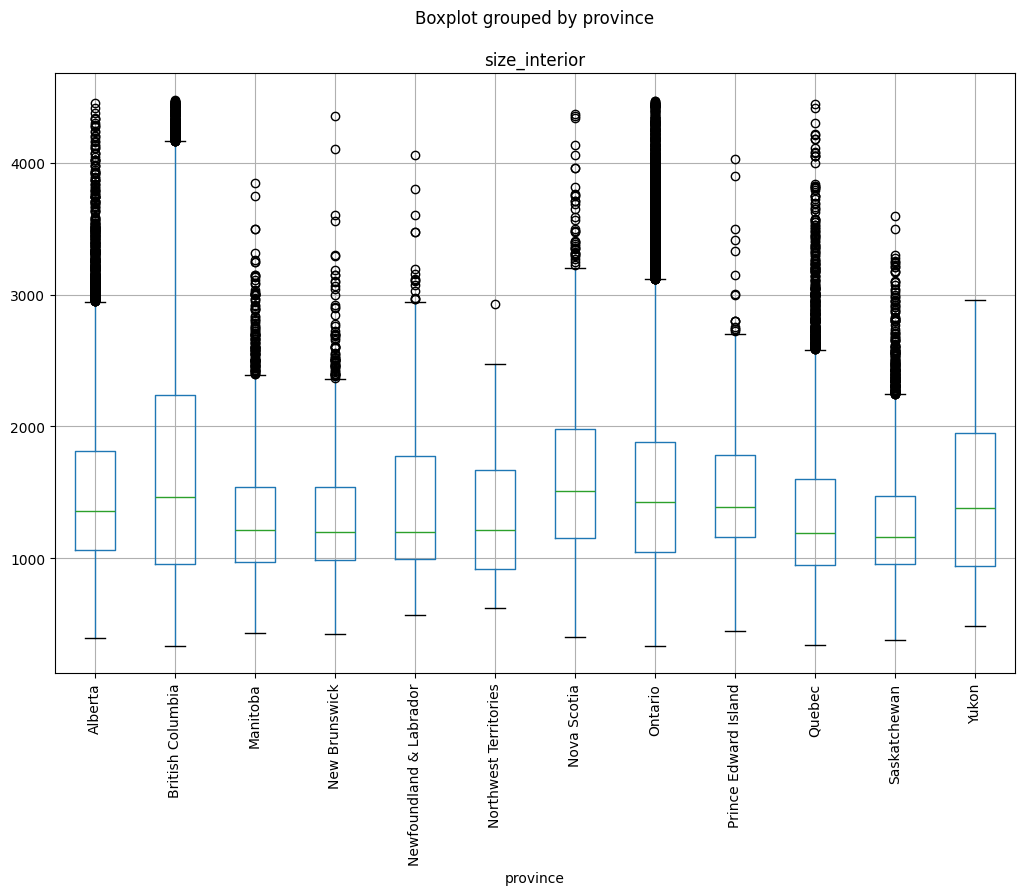

In [17]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171336 entries, 0 to 172998
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        171336 non-null  int64  
 1   id_mls                    171336 non-null  object 
 2   bathrooms_total           171336 non-null  float64
 3   bedrooms_extra            171336 non-null  float64
 4   bedrooms                  171336 non-null  float64
 5   stories_total             171336 non-null  float64
 6   size_interior             171336 non-null  float64
 7   building_type             171336 non-null  object 
 8   agency_name               171336 non-null  object 
 9   agency_type               171336 non-null  object 
 10  property_type             171336 non-null  object 
 11  lng                       171336 non-null  float64
 12  lat                       171336 non-null  float64
 13  ownership_type            171336 non-null  object

In [19]:
df["province"].value_counts()

province
Ontario                    83407
British Columbia           37423
Alberta                    23587
Quebec                      9111
Saskatchewan                6620
Manitoba                    5107
Nova Scotia                 2836
New Brunswick               1898
Prince Edward Island         591
Newfoundland & Labrador      574
Yukon                        123
Northwest Territories         59
Name: count, dtype: int64

In [20]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       83407.0
mean       917314.0
std        525998.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1090000.0
max      11488000.0
Name: price, dtype: float64

In [21]:
df.to_csv("data/lof/data-lof-2024-05-27.csv", index=False)